# **CSCE 5218 / CSCE 4930 Deep Learning**

# **HW1a The Perceptron** (20 pt)


In [7]:
# Get the datasets
!wget http://huang.eng.unt.edu/CSCE-5218/test.dat
!wget http://huang.eng.unt.edu/CSCE-5218/train.dat


--2023-02-18 02:51:26--  http://huang.eng.unt.edu/CSCE-5218/test.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2844 (2.8K)
Saving to: ‘test.dat.1’

test.dat.1          100%[===================>]   2.78K  --.-KB/s    in 0s      

2023-02-18 02:51:26 (297 MB/s) - ‘test.dat.1’ saved [2844/2844]

--2023-02-18 02:51:26--  http://huang.eng.unt.edu/CSCE-5218/train.dat
Resolving huang.eng.unt.edu (huang.eng.unt.edu)... 129.120.123.155
Connecting to huang.eng.unt.edu (huang.eng.unt.edu)|129.120.123.155|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 11244 (11K)
Saving to: ‘train.dat.1’

train.dat.1         100%[===================>]  10.98K  --.-KB/s    in 0s      

2023-02-18 02:51:26 (264 MB/s) - ‘train.dat.1’ saved [11244/11244]



In [8]:
# Take a peek at the datasets
!head train.dat
!head test.dat

A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13	
1	1	0	0	0	0	0	0	1	1	0	0	1	0
0	0	1	1	0	1	1	0	0	0	0	0	1	0
0	1	0	1	1	0	1	0	1	1	1	0	1	1
0	0	1	0	0	1	0	1	0	1	1	1	1	0
0	1	0	0	0	0	0	1	1	1	1	1	1	0
0	1	1	1	0	0	0	1	0	1	1	0	1	1
0	1	1	0	0	0	1	0	0	0	0	0	1	0
0	0	0	1	1	0	1	1	1	0	0	0	1	0
0	0	0	0	0	0	1	0	1	0	1	0	1	0
A1	A2	A3	A4	A5	A6	A7	A8	A9	A10	A11	A12	A13
1	1	1	1	0	0	1	1	0	0	0	1	1	0
0	0	0	1	0	0	1	1	0	1	0	0	1	0
0	1	1	1	0	1	1	1	1	0	0	0	1	0
0	1	1	0	1	0	1	1	1	0	1	0	1	0
0	1	0	0	0	1	0	1	0	1	0	0	1	0
0	1	1	0	0	1	1	1	1	1	1	0	1	0
0	1	1	1	0	0	1	1	0	0	0	1	1	0
0	1	0	0	1	0	0	1	1	0	1	1	1	0
1	1	1	1	0	0	1	1	0	0	0	0	1	0


### Build the Perceptron Model

You will need to complete some of the function definitions below.  DO NOT import any other libraries to complete this. 

In [9]:
import math
import itertools
import re


# Corpus reader, all columns but the last one are coordinates;
# the last column is the label
def read_data(file_name):
    f = open(file_name, 'r')

    data = []
    # Discard header line
    f.readline()
    for instance in f.readlines():
        if not re.search('\t', instance): continue
        instance = list(map(int, instance.strip().split('\t')))
        # Add a dummy input so that w0 becomes the bias
        instance = [-1] + instance
        data += [instance]
    return data


def dot_product(array1, array2):
    return sum([a * b for a, b in zip(array1, array2)])


def sigmoid(x):
    return 1 / (1 + math.exp(-x))


# The output of the model, which for the perceptron is
# the sigmoid function applied to the dot product of
# the instance and the weights
def output(weight, instance):
    return sigmoid(dot_product(weight, instance))


# Predict the label of an instance; this is the definition of the perceptron
# you should output 1 if the output is >= 0.5 else output 0
def predict(weights, instance):
    return 1 if output(weights, instance) >= 0.5 else 0


# Accuracy = percent of correct predictions
def get_accuracy(weights, instances):
    correct = sum([1 if predict(weights, instance) == instance[-1] else 0
                   for instance in instances])
    return correct * 100 / len(instances)


# Train a perceptron with instances and hyperparameters:
# lr (learning rate)
# epochs
# The implementation comes from the definition of the perceptron
#
# Training consists on fitting the parameters which are the weights
# that's the only thing training is responsible to fit
# (recall that w0 is the bias, and w1..wn are the weights for each coordinate)
#
# Hyperparameters (lr and epochs) are given to the training algorithm
# We are updating weights in the opposite direction of the gradient of the error,
# so with a "decent" lr we are guaranteed to reduce the error after each iteration.
def train_perceptron(instances, lr, epochs):
    weights = [0] * (len(instances[0])-1)

    for _ in range(epochs):
        for instance in instances:
            in_value = dot_product(weights, instance)
            output_value = sigmoid(in_value)
            error = instance[-1] - output_value
            for i in range(0, len(weights)):
                weights[i] += lr * error * output_value * (1 - output_value) * instance[i]

    return weights

## Run it

In [10]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
lr = 0.005
epochs = 10
weights = train_perceptron(instances_tr, lr, epochs)
accuracy = get_accuracy(weights, instances_te)
print(f"#tr: {len(instances_tr):3}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
      f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 400, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0


## Questions

Answer the following questions. Include your implementation and the output for each question.



### Question 1

In `train_perceptron(instances, lr, epochs)`, we have the follosing code:
```
in_value = dot_product(weights, instance)
output = sigmoid(in_value)
error = instance[-1] - output
```

Why don't we have the following code snippet instead?
```
output = predict(weights, instance)
error = instance[-1] - output
```

#### TODO Add your answer here (text only)

In the train_perceptron function, we are using the sigmoid function as the output because the output of the model (for the perceptron) is the sigmoid function applied to the dot product of the instance and the weights.

The output of the model is used to calculate the error (the difference between the predicted label and the true label), and then the error is used to update the weights. Therefore, we need to calculate the output of the model for each instance in order to train the model.

The predict function is used to make predictions on new instances after the model has been trained. It uses the weights that were learned during training and applies them to new instances to make predictions. So we use predict to make predictions on new instances, and sigmoid to calculate the output during training.


### Question 2
Train the perceptron with the following hyperparameters and calculate the accuracy with the test dataset.

```
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]              # number of epochs
lr = [0.005, 0.01, 0.05]              # learning rate
```

TODO: Write your code below and include the output at the end of each training loop (NOT AFTER EACH EPOCH)
of your code.The output should look like the following:
```
# tr:  20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
# tr:  20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
[and so on for all the combinations]
```
You will get different results with different hyperparameters.

#### TODO Add your answer here (code and output in the format above) 


In [6]:
instances_tr = read_data("train.dat")
instances_te = read_data("test.dat")
tr_percent = [5, 10, 25, 50, 75, 100] # percent of the training dataset to train with
num_epochs = [5, 10, 20, 50, 100]     # number of epochs
lr_array = [0.005, 0.01, 0.05]        # learning rate

for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      print(f"#tr: {len(pre_instances):0}, epochs: {epochs:3}, learning rate: {lr:.3f}; "
            f"Accuracy (test, {len(instances_te)} instances): {accuracy:.1f}")

#tr: 20, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 20, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs:  50, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 40, epochs: 100, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:   5, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  10, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
#tr: 100, epochs:  20, lea

### Question 3
Write a couple paragraphs interpreting the results with all the combinations of hyperparameters. Drawing a plot will probably help you make a point. In particular, answer the following:
- A. Do you need to train with all the training dataset to get the highest accuracy with the test dataset?
- B. How do you justify that training the second run obtains worse accuracy than the first one (despite the second one uses more training data)?
   ```
#tr: 100, epochs:  20, learning rate: 0.050; Accuracy (test, 100 instances): 71.0
#tr: 200, epochs:  20, learning rate: 0.005; Accuracy (test, 100 instances): 68.0
```
- C. Can you get higher accuracy with additional hyperparameters (higher than `80.0`)?
- D. Is it always worth training for more epochs (while keeping all other hyperparameters fixed)?

#### TODO: Add your answer here (code and text)



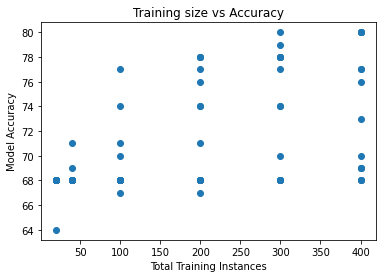

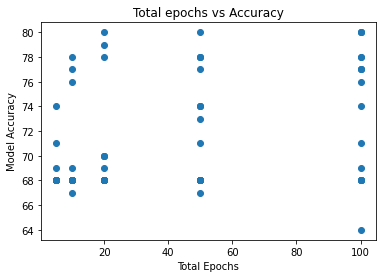

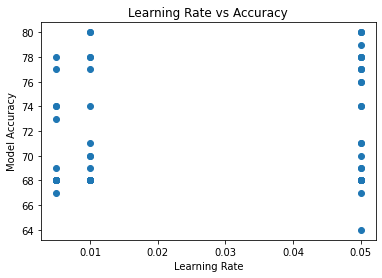

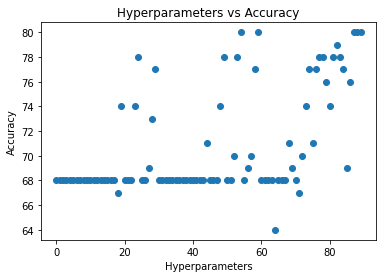

In [20]:
from matplotlib.offsetbox import HPacker
#plots

import matplotlib.pyplot as plt
trainsize = []
accy = []
num_eps = []
learnrate = []
sc= []
for lr in lr_array:
  for tr_size in tr_percent:
    for epochs in num_epochs:
      size =  round(len(instances_tr)*tr_size/100)
      pre_instances = instances_tr[0:size]
      weights = train_perceptron(pre_instances, lr, epochs)
      accuracy = get_accuracy(weights, instances_te)
      learnrate.append(lr)
      num_eps.append(epochs)
      trainsize.append(len(pre_instances))
      accy.append(accuracy)
      hp = (lr, tr_size, epochs)
      sc.append((hp, accuracy))

plt.title('Training size vs Accuracy')
plt.scatter(trainsize, accy)
plt.xlabel('Total Training Instances')
plt.ylabel('Model Accuracy')
plt.show()

plt.title('Total epochs vs Accuracy')
plt.scatter(num_eps, accy)
plt.xlabel('Total Epochs')
plt.ylabel('Model Accuracy')
plt.show()

plt.title('Learning Rate vs Accuracy')
plt.scatter(learnrate, accy)
plt.xlabel('Learning Rate')
plt.ylabel('Model Accuracy')
plt.show()

x = range(len(sc))
for s in sc:
  y = [s[1] for s in sc]
plt.title('Hyperparameters vs Accuracy')
plt.scatter(x, y)
plt.xlabel('Hyperparameters')
plt.ylabel('Accuracy')
plt.show()

Question 3 Answer:

a)Not necessarily. It is possible to achieve high accuracy on the test dataset by training the model on a subset of the training dataset, as long as the subset is representative of the overall distribution of the data.

However, using the full training dataset can provide more training data, which can lead to better generalization and higher accuracy on the test dataset. It is also important to make sure that the test dataset is separate from the training dataset and has not been used to train the model, in order to ensure that the accuracy measurement is a fair assessment of the model's performance on unseen data.

b)There could be several reasons why the second run obtains worse accuracy than the first one, despite using more training data. These are a few parameters "Overfitting", "Dataset Quality", "Hyperparameters", "Randomness", could influence the model more.

c) To increase the accuracy of the perceptron model, you can try adjusting the hyperparameters such as the learning rate (lr) and the number of epochs.

Learning rate: The learning rate controls how quickly the model adjusts its weights during training. A learning rate that is too high can cause the weights to oscillate and prevent the model from converging, while a learning rate that is too low can result in slow convergence. A good starting point is to try a learning rate of around 0.01, and then adjust it up or down depending on how well the model is performing.

Number of epochs: The number of epochs controls how many times the model iterates over the entire training set. A larger number of epochs can lead to overfitting, while a smaller number of epochs can result in underfitting. A good starting point is to try a smaller number of epochs, such as 5-10, and then adjust it up or down depending on how well the model is performing.

d)No, it is not always worth training for more epochs while keeping all other hyperparameters fixed. The reason is that, as the number of epochs increases, the model will continue to learn and fit the training data more closely, which may lead to overfitting. Overfitting occurs when a model becomes too complex and fits the training data too closely, to the point where it starts to memorize the training data instead of generalizing to new data.

At some point, increasing the number of epochs will not lead to better performance on new data, as the model will have started to overfit the training data. In practice, it is common to monitor the performance of the model on a validation set and stop training when the performance on the validation set stops improving or starts to get worse. This is known as early stopping, and it is a common regularization technique to prevent overfitting.